# Problem Statment 
    Levarage Guest data and Booking Behaviour patterns to devise a strategy for Hotel Revenue Management using data science and machine learning 

# Summary
In hotels, many people books the rooms and then at the and they apply for ticket cancellation and refunds. The hotels give them a refund on the basis of the days before arrival. At last, the customer is satisfied to get the refund he got but the hotel usually bears a load of loss as the hotel has a 40% to 50% of the booking amount but the room is most likely going to be empty so it could have been booked for another guest if the cancellation was done before the deadline or as early as possible.

In this project i created a model to find the guests who are most likely going to cancel their hotel booking. I also find the target population on whom we should focus more and how to target them.

This project can help the hotels to boost their revenue as the hotel rooms can be given to another person if the cancelation is confirmed before some time and not at the last moments.

# Dataset
    This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. This data set is from kaggel
    Dataset Features:
    hotel                          : Type of hotel example resort.
    is_canceled                    : Status of the ticket.
    lead_time                      : The time taken between when a customer makes a reservation and their actual arrival.
    arrival_month_year             : Month and year of arrival.
    arrival_date_year              : Date and year of arrival.
    arrival_date_month             : Date and month of arrival.
    arrival_date_week_number       : Date week no of arrival.
    arrival_date_day_of_month      : day of month of arrival.
    stays_in_weekend_nights        : Total days of stay on weekend nights.
    stays_in_week_nights           : Total days of stay on weeknights.
    adults                         : Total no of adults.
    children                       : Total no of children.
    babies                         : Total no of babies.
    meal                           : Type of meal taken (BB, BF). 
    country                        : Country from which guest arriving.
    is_repeated_guest              : Has the guest visited before(0, 1).
    previous_cancellations         : Has the guest had any cancellations before.
    reserved_room_type             : Type of room reserved(A, B, C, D...).
    assigned_room_type             : Type of room Assigned to guest (A, B, C ...).
    booking_changes                : Has the booking made changed in date or time.
    agent                          : Is the booking made through an agent.
    adr                            : Measure of the average rate paid per room. ADR(Average Daily Rate)
    required_car_parking_spaces    : Number of car parking spaces required by guest.
    total_of_special_requests      : Total no of special Requests.
    reservation_status             : Status of reservation.
    reservation_status_date        : date of reservation status.

# Importing Libraries

In [166]:
df = pd.read_csv('C:/Users/aksin52/Documents/Machine Learning Express/Build a project portfolio with Machine Learning/Hotel Booking Demand Prediction/Data Folder/hotel_bookings.csv',header=0)

In [167]:
df.shape

(119390, 33)

In [168]:
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [169]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

# Setting Display options to ensure feature name visibility

In [170]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [171]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [172]:
# No ID is mentioned so we don't perform the drop step

# Defining Target and Independent Features

In [173]:
Y=df[['is_canceled']]
X=df.drop(['is_canceled'],axis=1)

# Get the Response Rate

In [174]:
Y.mean()

is_canceled    0.370416
dtype: float64

# Split features into Numerical and Categorical

In [175]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [176]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [177]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17


In [178]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [179]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [180]:
slice2

,feature_levels
lead_time,479
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_week_nights,35
previous_bookings_not_canceled,73
booking_changes,21
agent,333
company,352
days_in_waiting_list,128
adr,8879


In [181]:
num.shape

(119390, 10)

In [182]:
char=pd.concat([char,cat],axis=1,join="inner")

In [183]:
num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,3,NaN,NaN,0,0.0
1,737,27,1,0,0,4,NaN,NaN,0,0.0
2,7,27,1,1,0,0,NaN,NaN,0,75.0
3,13,27,1,1,0,0,304.0,NaN,0,75.0
4,14,27,1,2,0,0,240.0,NaN,0,98.0


# Outlier Analysis of Numerical Features

In [184]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


# Capping and Flooring of outliers

In [185]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [186]:
num=num.apply(lambda x : outlier_cap(x))

In [187]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,86.008598,189.206373,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,108.591334,131.297172,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


# Missing Value Analysis

In [188]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

In [189]:
char.isnull().mean()

hotel                          0.000000
arrival_month_year             0.000000
arrival_date_month             0.000000
meal                           0.000000
country                        0.004087
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
deposit_type                   0.000000
customer_type                  0.000000
reservation_status             0.000000
reservation_status_date        0.000000
arrival_date_year              0.000000
stays_in_weekend_nights        0.000000
adults                         0.000000
children                       0.000034
babies                         0.000000
is_repeated_guest              0.000000
previous_cancellations         0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

# Dropping variables that have >25% missing values

In [190]:
num = num.loc[:, X.isnull().mean() <= .25]

# Imputation of Missing Values

In [191]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [192]:
num_1.shape

(119390, 9)

In [193]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [194]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [148]:
num_2.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

# Part 1 - Bi Variate Analysis (Feature Discretization)

In [142]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.tail()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0
119389,8.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0


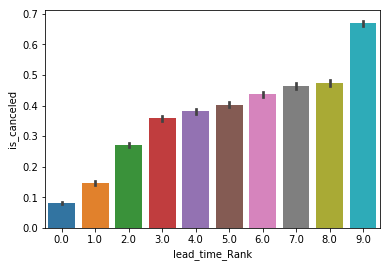

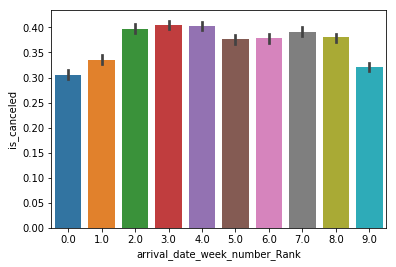

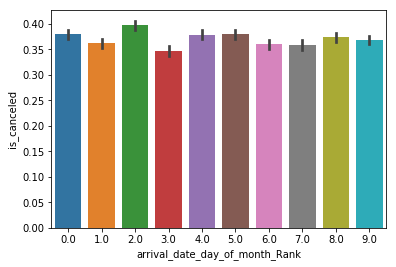

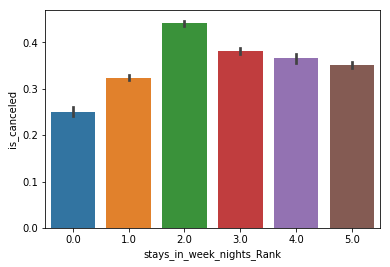

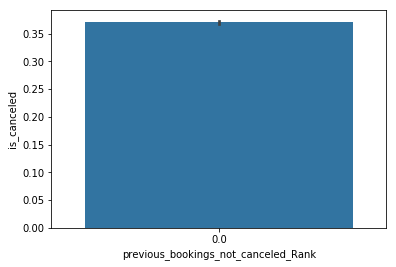

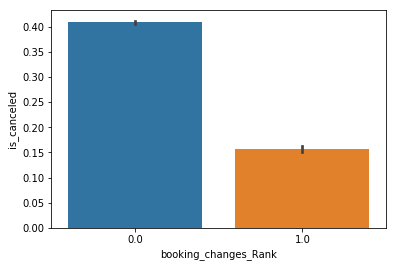

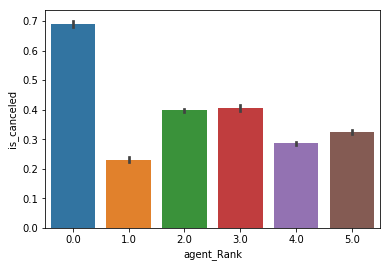

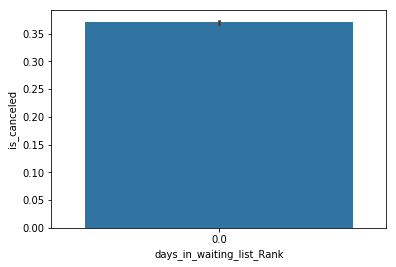

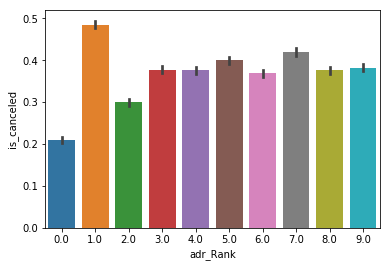

In [143]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="is_canceled",data=X_bin_combined, estimator=mean )
plt.show()

In [195]:
# Check the descriptive statistics for the following features
# previous_bookings_not_canceled
# days_in_waiting_list
# booking_changes

num_2['day_wait_ind']=np.where(num_2['days_in_waiting_list']>0,1,0)
num_2['previous_bookings_not_canceled_ind']=np.where(num_2['previous_bookings_not_canceled']>0,1,0)
num_2['booking_changes_ind']=np.where(num_2['booking_changes']>0,1,0)

In [196]:
num_varlist=['adr','arrival_date_day_of_month','arrival_date_week_number','days_in_waiting_list','previous_bookings_not_canceled',
            'booking_changes']
num_2=num_2.drop(num_varlist,axis=1)

In [153]:
num_2.dtypes

lead_time                             float64
stays_in_week_nights                  float64
agent                                 float64
day_wait_ind                            int32
previous_bookings_not_canceled_ind      int32
booking_changes_ind                     int32
dtype: object

In [156]:
num_2.shape

(119390, 6)

# Part 2 - Select K Best

In [197]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=4)
selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_2.iloc[:,cols]

In [198]:
select_features_df_num.iloc[0]

lead_time                             342.000000
agent                                  86.008598
previous_bookings_not_canceled_ind      0.000000
booking_changes_ind                     1.000000
Name: 0, dtype: float64

# Feature Selection - Categorical Features 

In [159]:
char.dtypes

hotel                           object
arrival_month_year              object
arrival_date_month              object
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
reservation_status              object
reservation_status_date         object
arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

# Part 1 - Bi Variate Analysis

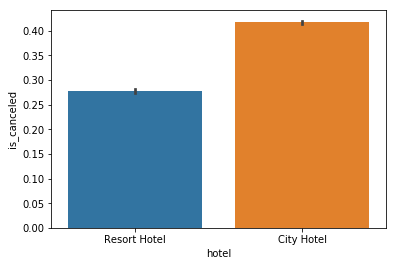

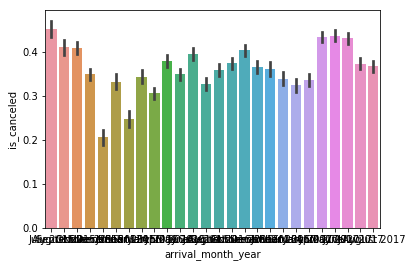

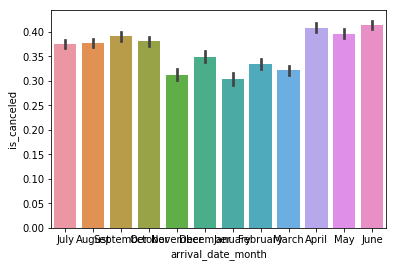

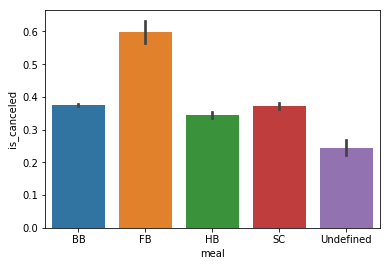

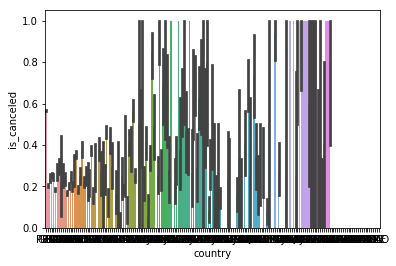

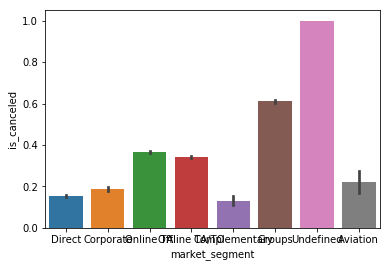

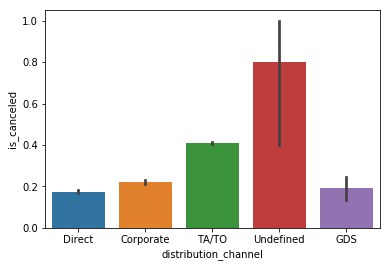

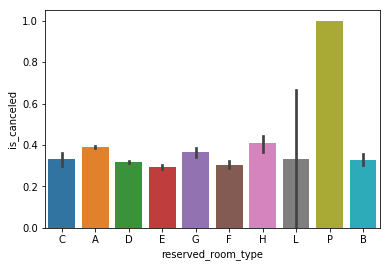

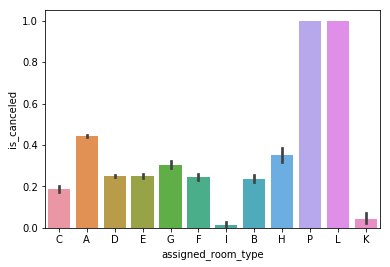

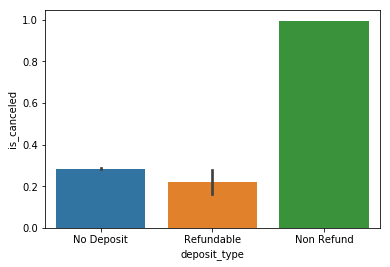

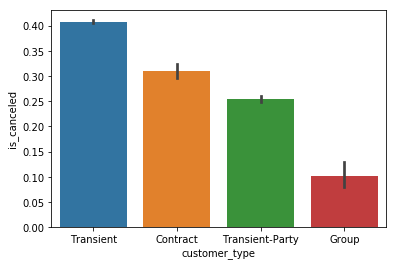

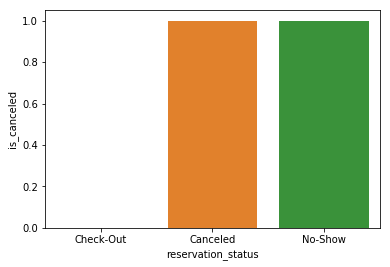

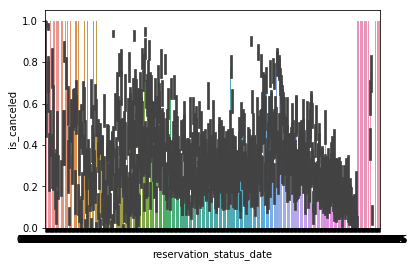

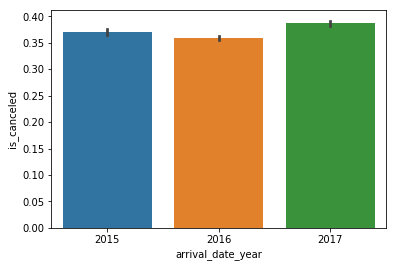

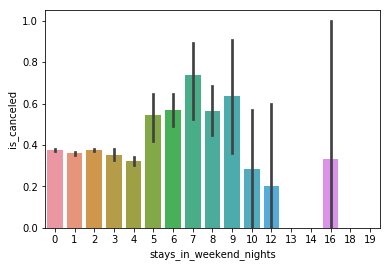

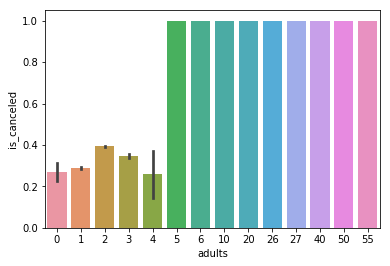

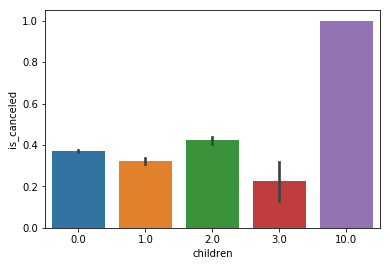

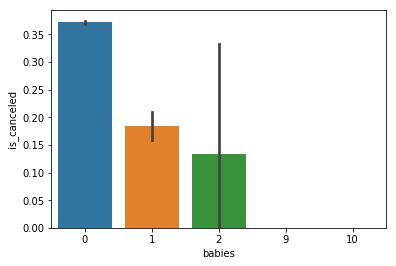

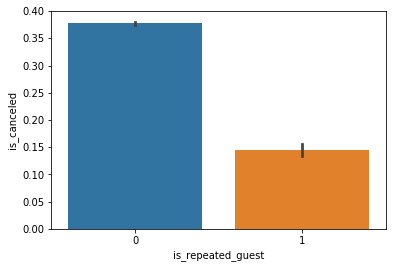

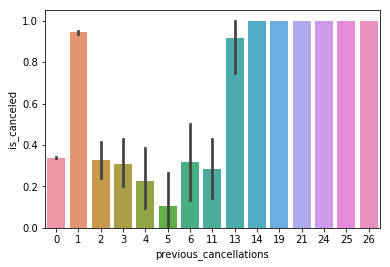

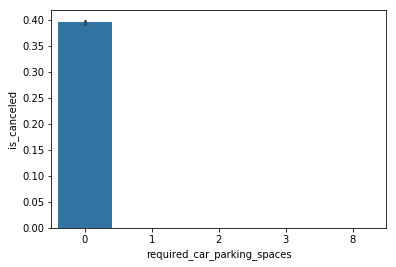

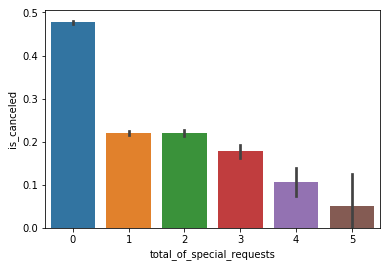

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="is_canceled",data=X_char_merged, estimator=mean )
plt.show()

In [203]:
charlist=['arrival_date_month','country','reserved_room_type','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year']
char_1=char_1.drop(charlist,axis=1)

In [204]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(119390, 107)

# Part 2 - Select K Best

In [205]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=100)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [206]:
#select_features_df_char.iloc[0]

# Creating the Master Feature Set for Model Development

In [207]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [208]:
Y['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

# Train Test Split

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [215]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (83573, 81)
Shape of Testing Data (35817, 81)
Response Rate in Training Data is_canceled    0.369557
dtype: float64
Response Rate in Testing Data is_canceled    0.372421
dtype: float64


In [46]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [216]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [48]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [140,280,420,560,700] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 140}


In [217]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [218]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [219]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=5,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=140,
                           random_state=0)

In [220]:
# Model Evaluation

y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)


In [221]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [222]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7681827065360024
Precision 0.8006926200143301
Recall 0.5026613689182098
f1_score 0.6176023580343574


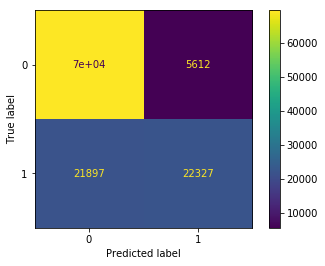

In [229]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [225]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7519613591311388
Precision 0.9959919839679359
Recall 0.33533248369442986
f1_score 0.5017386427369602


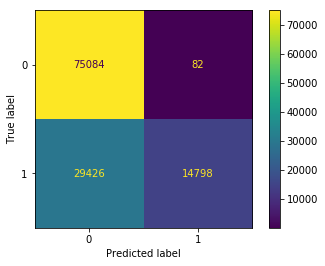

In [230]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [227]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7962140882821007
Precision 0.8294785075278202
Recall 0.5699827573281355
f1_score 0.6756720728726949


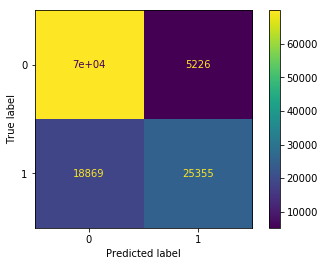

In [231]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [ ]:
# Lorenz Curve

In [ ]:
# Decsion Tree Lorenz Curve

In [238]:
y_pred_prob = gbm.predict_proba(X_final)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_dtree')['is_canceled'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_dtree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actutal_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_dtree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,11939,1.000000,0.992177,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,0.1,0.1,1,2.699665
1,9,11939,0.780719,0.718368,9321.0,21260.0,0.210768,0.480734,2618.0,2618.0,0.034830,0.034830,0.4459,0.1,0.2,2,2.107679
2,8,11939,0.551386,0.512931,6583.0,27843.0,0.148856,0.629590,5356.0,7974.0,0.071256,0.106085,0.5235,0.1,0.3,3,1.488558
3,7,11939,0.298350,0.355653,3562.0,31405.0,0.080545,0.710135,8377.0,16351.0,0.111447,0.217532,0.4926,0.1,0.4,4,0.805445
4,6,11939,0.377000,0.312590,4501.0,35906.0,0.101777,0.811912,7438.0,23789.0,0.098954,0.316486,0.4954,0.1,0.5,5,1.017773
5,5,11939,0.248094,0.253638,2962.0,38868.0,0.066977,0.878889,8977.0,32766.0,0.119429,0.435915,0.4430,0.1,0.6,6,0.669772
6,4,11939,0.177737,0.205839,2122.0,40990.0,0.047983,0.926872,9817.0,42583.0,0.130604,0.566519,0.3604,0.1,0.7,7,0.479830
7,3,11939,0.128570,0.159275,1535.0,42525.0,0.034710,0.961582,10404.0,52987.0,0.138414,0.704933,0.2566,0.1,0.8,8,0.347097
8,2,11939,0.093978,0.120716,1122.0,43647.0,0.025371,0.986953,10817.0,63804.0,0.143908,0.848841,0.1381,0.1,0.9,9,0.253708
9,1,11939,0.048329,0.066933,577.0,44224.0,0.013047,1.000000,11362.0,75166.0,0.151159,1.000000,-0.0000,0.1,1.0,10,0.130472


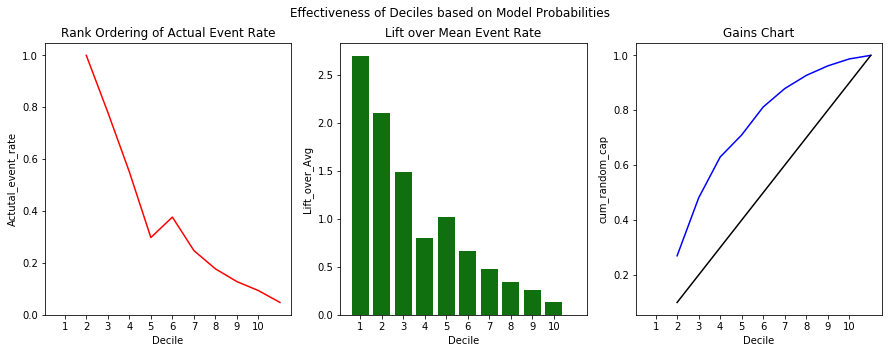

In [239]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [243]:
# Audience
df['Predicted_cancel_Rank']=np.where(df['P_Rank_dtree']<8,"Bottom7","Top3")
df.Predicted_cancel_Rank.value_counts()

Bottom7    83573
Top3       35817
Name: Predicted_cancel_Rank, dtype: int64

In [253]:
df_top3=df.loc[df['Predicted_cancel_Rank']=='Top3',:]

In [252]:
df_top3.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,y_pred_P,P_Rank_dtree,pred_prob,P_Rank_tree,Predicted_cancel_Rank


In [254]:
service_list=['stays_in_weekend_nights','total_of_special_requests','reserved_room_type']

In [255]:
df_top3_services=df_top3[service_list]

In [248]:
df_top3_services.head()

,stays_in_weekend_nights,total_of_special_requests,reserved_room_type


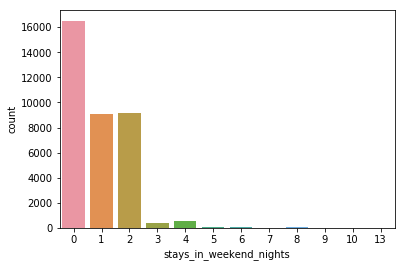

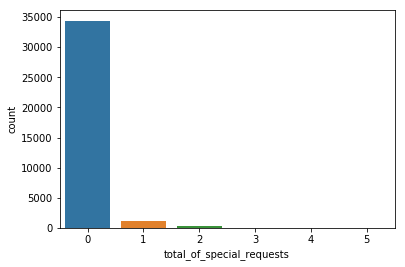

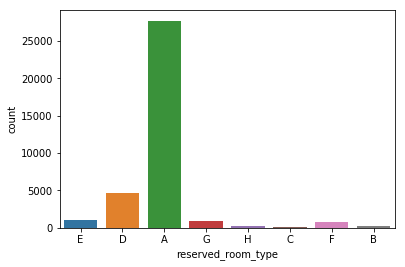

In [256]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [259]:
df['lead_time_RANK']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1

In [260]:
df.groupby('lead_time_RANK')['lead_time'].agg(['min','mean','max'])

,min,mean,max
lead_time_RANK,,,
1,0,0.652735,3
2,3,6.449703,11
3,11,18.337465,26
4,26,35.099757,45
5,45,56.680291,69
6,69,83.823603,99
7,99,117.566044,138
8,138,160.550130,184
9,184,219.433286,265


In [261]:
df.lead_time.mean()

104.01141636652986

In [275]:
df['lead_time_segment']=np.where(df['lead_time_RANK']>=7,"High Lead Time","Low Lead Time")
df.lead_time_segment.value_counts()

Low Lead Time     71634
High Lead Time    47756
Name: lead_time_segment, dtype: int64

In [264]:
df['adr_RANK']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1

In [265]:
df.groupby('adr_RANK')['adr'].agg(['min','mean','max'])

,min,mean,max
adr_RANK,,,
1,-6.38,32.638938,50.00
2,50.00,59.250104,64.00
3,64.00,69.332909,75.00
4,75.00,79.526233,85.00
5,85.00,89.482808,94.56
6,94.59,99.285965,105.00
7,105.00,111.376652,118.15
8,118.15,125.793015,135.00
9,135.00,147.667347,164.00


In [266]:
df.adr.mean()

101.83112153446453

In [276]:
df['adr_segment']=np.where(df['adr_RANK']>=7,"High ADR","Low ADR")
df.adr_segment.value_counts()

Low ADR     71634
High ADR    47756
Name: adr_segment, dtype: int64

In [277]:
pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'],values=df['adr'],aggfunc='mean')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,141.203654,151.099370
Low ADR,74.960245,69.300239


In [278]:
pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'],values=df['adr'],aggfunc='count')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,18825,28931
Low ADR,28931,42703


# Recommendation

Based on the above data we can target the high ADE and Low Lead time guests first and the management can call them and get the status of the booking and get connected to them. Because as soon we got to know they are going to cancel their booking we can give the room to someone else